# Data Normalization Tutorial

Data normalization is a critical preprocessing step in many machine learning workflows, helping to ensure that the model treats all features equally, especially when they are measured on different scales. Below, I'll provide Python code for several common data normalization techniques: Min-Max Scaling, Z-score Normalization, Robust Scaling, and Unit Vector Scaling. We will use Python's scikit-learn library to demonstrate these techniques.

## 1. Import Required Libraries

We'll need pandas for data manipulation and scikit-learn for the scaling functions:

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## 2. Load and Prepare Your Data

Load your dataset into a DataFrame. Assume it’s stored in a CSV file:

In [97]:
data_url = 'https://raw.githubusercontent.com/tribasuki74/AppliedDataEngineering/refs/heads/main/Code/dataset/Clean_data.csv'
df = pd.read_csv(data_url, index_col=0)

display(df.head())
print()

print(df.dtypes)
print()

print(df.shape)
print()


,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,2.0,1960.0,2.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,215000.0
2.0,526350040.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,105000.0
3.0,526351010.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,172000.0
4.0,526353030.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,2.0,1968.0,2.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,244000.0
5.0,527105010.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,189900.0



PID                float64
MS SubClass        float64
Lot Frontage       float64
Lot Area           float64
Overall Qual       float64
Overall Cond       float64
Year Built         float64
Year Remod/Add     float64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF         float64
2nd Flr SF         float64
Low Qual Fin SF    float64
Gr Liv Area        float64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath          float64
Half Bath          float64
Bedroom AbvGr      float64
Kitchen AbvGr      float64
TotRms AbvGrd      float64
Fireplaces         float64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF       float64
Open Porch SF      float64
Enclosed Porch     float64
3Ssn Porch         float64
Screen Porch       float64
Pool Area          float64
Misc Val           float64
Mo Sold            float64
Yr Sold            float64


For the demonstration, let’s assume you want to normalize all numeric columns in the dataset:


In [112]:
# Selecting numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols[1:-1]]

# Checking for missing values in each column
missing_values = data.isnull().sum()

# Displaying only columns that have missing values
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)
print()

display(data.head())
print()

print(data.shape)
print()


Columns with missing values:
Series([], dtype: int64)



,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,2.0,1960.0,2.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
2.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
3.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
4.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,2.0,1968.0,2.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
5.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0



(2930, 36)



We handle the missing value using K-Nearest Neighbors Imputation

In [113]:
from sklearn.impute import KNNImputer

# Create an imputer object with KNN
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

display(data.head())
print()

print(data.shape)
print()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,2.0,1960.0,2.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
1,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
2,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
3,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,2.0,1968.0,2.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
4,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0



(2930, 36)



Let's see the BoxPlot of the original data

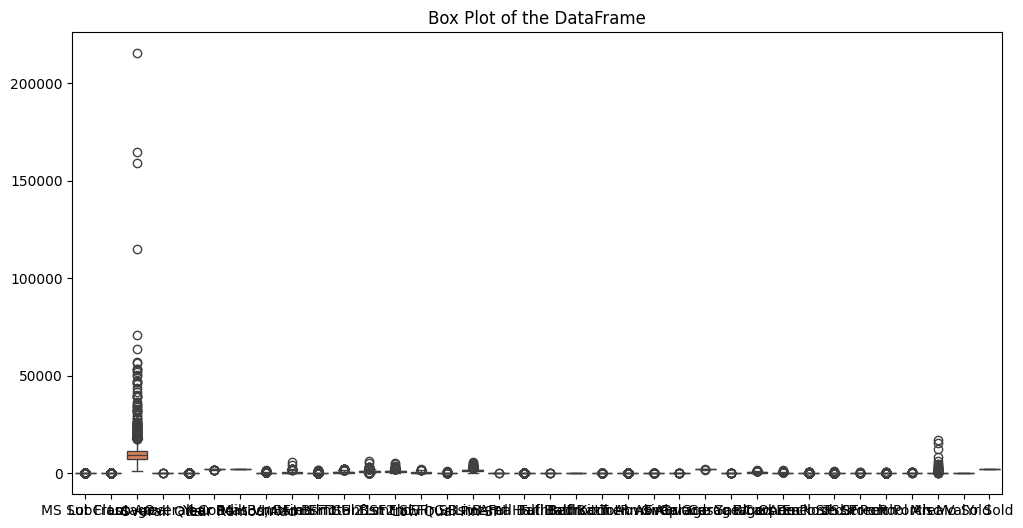

In [114]:
# before normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot of the DataFrame')
plt.show()


## 3. Min-Max Scaling

Min-Max Scaling shrinks the range of feature values to scale between 0 and 1. It is very useful when you need a bounded range and is sensitive to outliers.

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0.000000,0.410959,0.142420,0.555556,0.500,0.637681,0.166667,0.0700,0.113218,0.000000,0.188784,0.176759,0.277673,0.000000,0.0,0.249058,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.50,0.208333,0.4,0.354839,0.147472,0.083558,0.0,0.0,0.000000,0.0,0.000000,0.363636,1.0
1,0.000000,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.0000,0.082920,0.094364,0.115582,0.144354,0.118042,0.000000,0.0,0.105878,0.000000,0.0,0.25,0.0,0.250,0.333333,0.230769,0.00,0.211538,0.2,0.490591,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0
2,0.000000,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.0675,0.163536,0.000000,0.173801,0.217512,0.208990,0.000000,0.0,0.187453,0.000000,0.0,0.25,0.5,0.375,0.333333,0.307692,0.00,0.201923,0.2,0.209677,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0
3,0.000000,0.246575,0.046087,0.666667,0.500,0.695652,0.300000,0.0000,0.188696,0.000000,0.447346,0.345336,0.373031,0.000000,0.0,0.334589,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.50,0.233974,0.4,0.350806,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.272727,1.0
4,0.235294,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.0000,0.140149,0.000000,0.058647,0.151882,0.124764,0.339467,0.0,0.243971,0.000000,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.326923,0.4,0.323925,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0



(2930, 36)



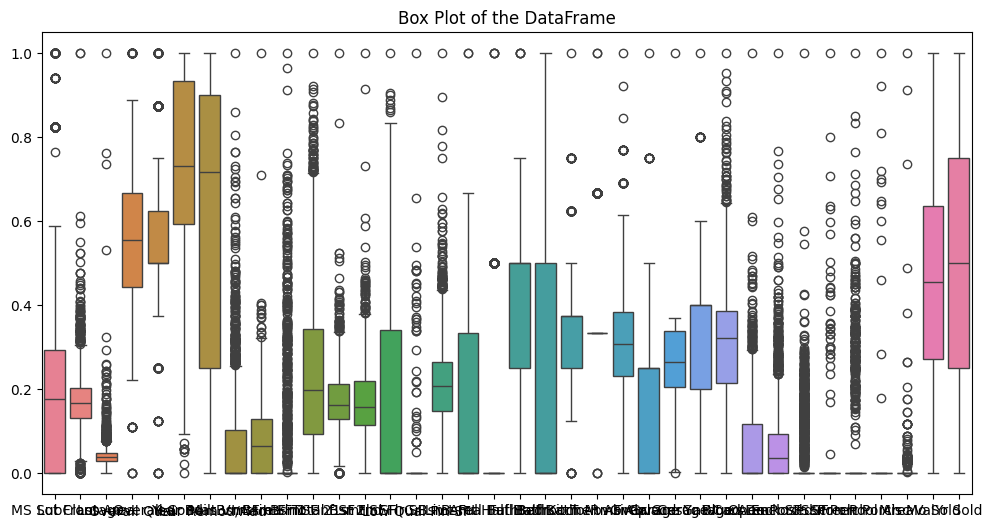

In [116]:
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the data
data_min_max = min_max_scaler.fit_transform(data)

# Convert the array back to a DataFrame
df_min_max = pd.DataFrame(data_min_max, columns=data.columns)

display(df_min_max.head())
print()

print(df_min_max.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_min_max)
plt.title('Box Plot of the DataFrame')
plt.show()


## 4. Z-Score Normalization

Also known as Standard Scaling, this method scales the data to have zero mean and a variance of one. It's ideal for data that follows a normal distribution and is less sensitive to outliers compared to Min-Max scaling.


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-0.877005,3.214927,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.055631,0.431329,-0.293918,-0.268914,0.064888,1.267003,-0.783185,-0.101005,0.309265,1.084104,-0.24922,-1.024793,-0.755203,0.176094,-0.207291,0.354167,2.162180,-0.663322,0.306924,0.256802,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499
1,-0.877005,0.468504,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.571042,0.055882,0.557582,-0.658097,-0.384495,-0.672643,-0.783185,-0.101005,-1.194427,-0.822285,-0.24922,-1.024793,-0.755203,-1.032234,-0.207291,-0.917535,-0.925143,-0.624338,-1.008210,1.196433,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499
2,-0.877005,0.513527,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.033249,1.054879,-0.293918,-0.348572,0.630022,0.432445,-0.783185,-0.101005,-0.337718,-0.822285,-0.24922,-1.024793,1.234675,0.176094,-0.207291,-0.281684,-0.925143,-0.741292,-1.008210,-0.747952,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499
3,-0.877005,1.053807,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.571042,1.366654,-0.293918,1.105744,2.402589,2.425687,-0.783185,-0.101005,1.207523,1.084104,-0.24922,0.784028,1.234675,0.176094,-0.207291,0.990018,2.162180,-0.351445,0.306924,0.228892,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499
4,0.061285,0.198364,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.571042,0.765060,-0.293918,-0.960795,-0.280093,-0.590974,0.853432,-0.101005,0.255844,-0.822285,-0.24922,0.784028,1.234675,0.176094,-0.207291,-0.281684,0.618518,0.779111,0.306924,0.042827,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499



(2930, 36)



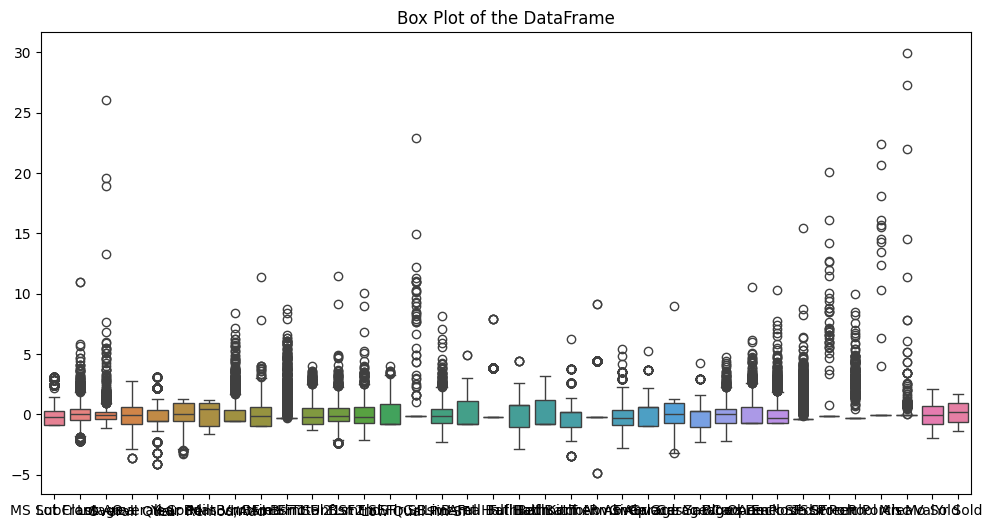

In [117]:
# Initialize the StandardScaler
standard_scaler = StandardScaler()

# Fit and transform the data
data_standard = standard_scaler.fit_transform(data)

# Convert the array back to a DataFrame
df_standard = pd.DataFrame(data_standard, columns=data.columns)

display(df_standard.head())
print()

print(df_standard.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standard)
plt.title('Box Plot of the DataFrame')
plt.show()


## 5. Robust Scaling

Robust Scaling uses the median and the interquartile range for scaling. It's particularly useful when the data contains outliers, as it is robust against them.

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-0.6,3.454988,5.427339,0.0,0.0,-0.276596,-0.846154,0.682927,0.366485,0.0,-0.042042,0.176991,1.126539,0.000000,0.0,0.346980,1.0,0.0,-1.0,0.0,0.0,0.0,0.5,1.0,-0.428571,0.0,0.187500,1.250000,0.500000,0.0,0.0,0.0,0.0,0.0,-0.25,1.0
1,-0.6,0.486618,0.531106,-0.5,1.0,-0.255319,-0.820513,0.000000,0.133515,144.0,-0.335478,-0.212389,-0.370261,0.000000,0.0,-0.885286,0.0,0.0,-1.0,0.0,-1.0,0.0,-0.5,-1.0,-0.404762,-1.0,0.976562,0.833333,-0.385714,0.0,0.0,120.0,0.0,0.0,0.00,1.0
2,-0.6,0.535280,1.173876,0.0,1.0,-0.319149,-0.897436,0.658537,0.753406,0.0,-0.102102,0.666667,0.482521,0.000000,0.0,-0.183218,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,-0.476190,-1.0,-0.656250,2.339286,0.128571,0.0,0.0,0.0,0.0,12500.0,0.00,1.0
3,-0.6,1.119221,0.418834,0.5,0.0,-0.106383,-0.641026,0.000000,0.946866,0.0,0.994423,2.202557,2.020679,0.000000,0.0,1.083097,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.238095,0.0,0.164062,0.000000,-0.385714,0.0,0.0,0.0,0.0,0.0,-0.50,1.0
4,0.2,0.194647,1.067679,-0.5,0.0,0.510638,0.128205,0.000000,0.573569,0.0,-0.563707,-0.121927,-0.307238,0.996092,0.0,0.303202,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.452381,0.0,0.007812,1.261905,0.100000,0.0,0.0,0.0,0.0,0.0,-0.75,1.0



(2930, 36)



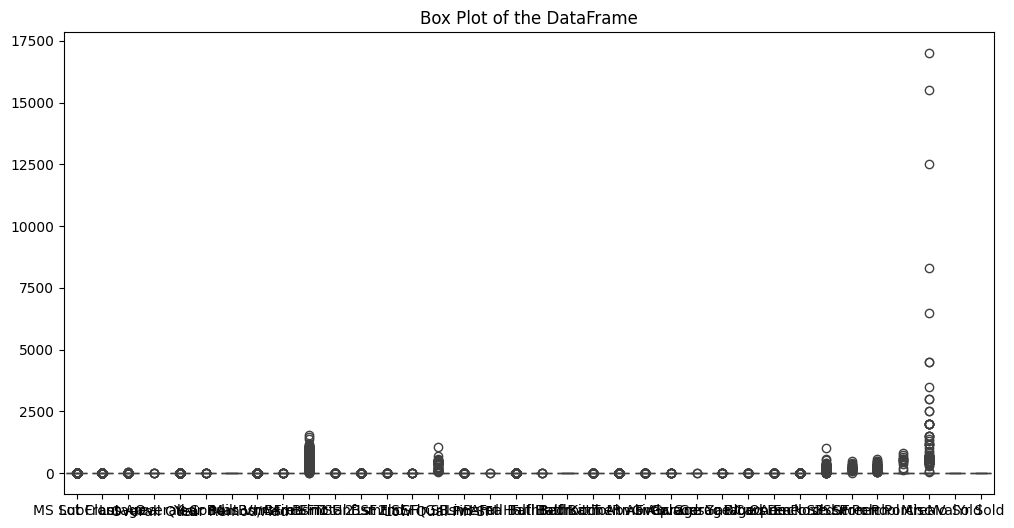

In [118]:
# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data
data_robust = robust_scaler.fit_transform(data)

# Convert the array back to a DataFrame
df_robust = pd.DataFrame(data_robust, columns=data.columns)

display(df_robust.head())
print()

print(df_robust.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_robust)
plt.title('Box Plot of the DataFrame')
plt.show()


## 6. Unit Vector Scaling

Unit Vector Scaling scales the feature vector for each data point to have a Euclidean length of one. This type of scaling is often used when using cosine similarity measures.

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,0.000622,0.004388,0.988712,0.000187,0.000156,0.060997,0.060997,0.003486,0.019886,0.000000,0.013724,0.033611,0.051536,0.000000,0.0,0.051536,0.000031,0.0,0.000031,0.000000,0.000093,0.000031,0.000218,0.000062,0.060997,0.000062,0.016432,0.006535,0.001929,0.0,0.0,0.000000,0.0,0.000000,0.000156,0.062553
1,0.001612,0.006448,0.936778,0.000403,0.000484,0.158064,0.158064,0.000000,0.037723,0.011607,0.021763,0.071093,0.072221,0.000000,0.0,0.072221,0.000000,0.0,0.000081,0.000000,0.000161,0.000081,0.000403,0.000000,0.158064,0.000081,0.058841,0.011285,0.000000,0.0,0.0,0.009672,0.0,0.000000,0.000484,0.162014
2,0.001023,0.004145,0.730034,0.000307,0.000307,0.100190,0.100190,0.005526,0.047229,0.000000,0.020775,0.068004,0.068004,0.000000,0.0,0.068004,0.000000,0.0,0.000051,0.000051,0.000154,0.000051,0.000307,0.000000,0.100190,0.000051,0.015965,0.020110,0.001842,0.0,0.0,0.000000,0.0,0.639618,0.000307,0.102851
3,0.001601,0.007444,0.893317,0.000560,0.000400,0.157531,0.157531,0.000000,0.085249,0.000000,0.083648,0.168898,0.168898,0.000000,0.0,0.168898,0.000080,0.0,0.000160,0.000080,0.000240,0.000080,0.000640,0.000160,0.157531,0.000160,0.041784,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000320,0.160893
4,0.004110,0.005069,0.947446,0.000343,0.000343,0.136808,0.136876,0.000000,0.054189,0.000000,0.009385,0.063574,0.063574,0.048023,0.0,0.111597,0.000000,0.0,0.000137,0.000069,0.000206,0.000069,0.000411,0.000069,0.136808,0.000137,0.033020,0.014523,0.002329,0.0,0.0,0.000000,0.0,0.000000,0.000206,0.137698



(2930, 36)



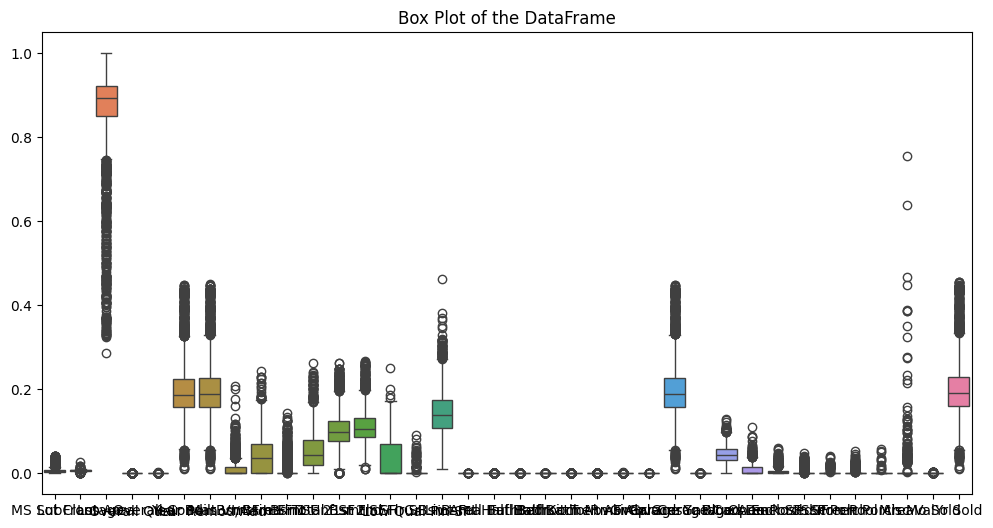

In [119]:
# Initialize the Normalizer
normalizer = Normalizer()

# Fit and transform the data
data_normalized = normalizer.fit_transform(data)

# Convert the array back to a DataFrame
df_normalized = pd.DataFrame(data_normalized, columns=data.columns)

display(df_normalized.head())
print()

print(df_normalized.shape)
print()

# after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_normalized)
plt.title('Box Plot of the DataFrame')
plt.show()


## Explanation and Use Cases:

- Min-Max Scaling: Good for cases when you need values in a bounded interval. Susceptible to outliers as they can compress the majority of the data into a narrow range.

- Z-Score Normalization: Suitable for data with properties of a normal distribution. This method standardizes the features so that they are centered around 0 with a standard deviation of 1.

- Robust Scaling: Best for datasets with outliers. This method uses more robust estimates for the center and range of your data.

- Unit Vector Scaling: Useful for text data or when using algorithms that rely on the cosine of angle between vectors.

# Data Standardization Tutorial

Data standardization is an essential process in data preprocessing to modify the scale and distribution of features. Here, I'll cover three common data standardization techniques: Mean Centering and Variance Scaling, Median and MAD (Median Absolute Deviation) Scaling, and Quantile Transformation. We will use Python and the scikit-learn library to implement these methods.

## 1. Import Required Libraries


First, let's import the necessary Python libraries. We'll need pandas for data manipulation, numpy for numerical operations, and scikit-learn for the scaling functions:



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer


## 2. Load Your Data

Assume your dataset is in a CSV file. Here's how you can load it into a pandas DataFrame:

In [102]:
data_url = 'https://raw.githubusercontent.com/tribasuki74/AppliedDataEngineering/refs/heads/main/Code/dataset/Clean_data.csv'
df = pd.read_csv(data_url, index_col=0)

display(df.head())
print()

print(df.dtypes)
print()

print(df.shape)
print()


,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,526301100.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,2.0,1960.0,2.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,215000.0
2.0,526350040.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,105000.0
3.0,526351010.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,172000.0
4.0,526353030.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,2.0,1968.0,2.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,244000.0
5.0,527105010.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,189900.0



PID                float64
MS SubClass        float64
Lot Frontage       float64
Lot Area           float64
Overall Qual       float64
Overall Cond       float64
Year Built         float64
Year Remod/Add     float64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF         float64
2nd Flr SF         float64
Low Qual Fin SF    float64
Gr Liv Area        float64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath          float64
Half Bath          float64
Bedroom AbvGr      float64
Kitchen AbvGr      float64
TotRms AbvGrd      float64
Fireplaces         float64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF       float64
Open Porch SF      float64
Enclosed Porch     float64
3Ssn Porch         float64
Screen Porch       float64
Pool Area          float64
Misc Val           float64
Mo Sold            float64
Yr Sold            float64


Select all columns and remove PID and SalePrice columns

Columns with missing values:
Series([], dtype: int64)

(2930, 38)



,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,20.0,141.0,31770.0,6.0,5.0,1960.0,1960.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,0.0,1656.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,2.0,1960.0,2.0,528.0,210.0,62.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
2.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
3.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
4.0,20.0,93.0,11160.0,7.0,5.0,1968.0,1968.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,0.0,2110.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,2.0,1968.0,2.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010.0
5.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0



(2930, 36)



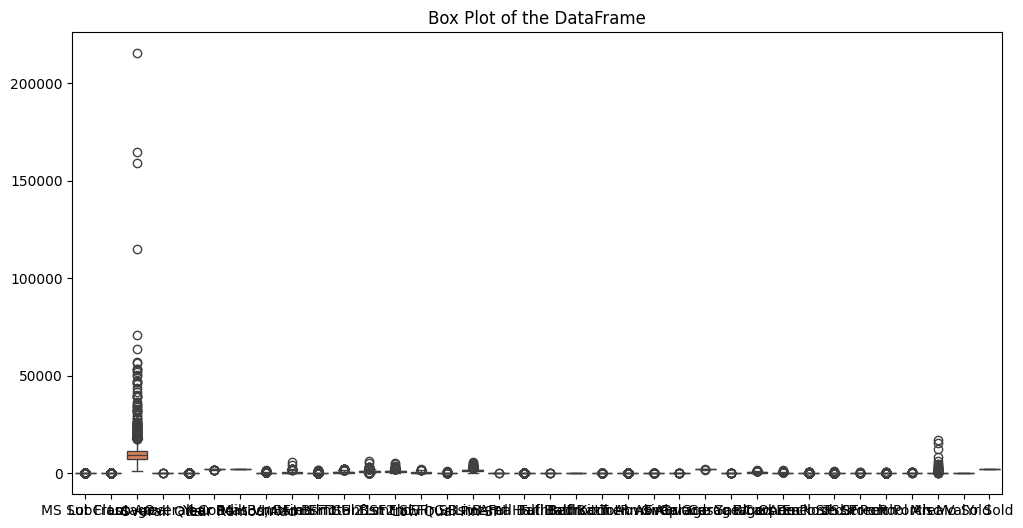

In [107]:
# Selecting numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
data = df[numeric_cols[1:-1]]

# Checking for missing values in each column
missing_values = data.isnull().sum()

# Displaying only columns that have missing values
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)
print()

display(data.head())
print()

print(data.shape)
print()

# before standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot of the DataFrame')
plt.show()


## 3. Mean Centering and Variance Scaling

This method involves subtracting the mean from each data point and dividing by the standard deviation. This results in a distribution with a mean of zero and a standard deviation of one, often assumed by many machine learning algorithms.

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-0.877005,3.214927,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.055631,0.431329,-0.293918,-0.268914,0.064888,1.267003,-0.783185,-0.101005,0.309265,1.084104,-0.24922,-1.024793,-0.755203,0.176094,-0.207291,0.354167,2.162180,-0.663322,0.306924,0.256802,0.920121,0.214409,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499
1,-0.877005,0.468504,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.571042,0.055882,0.557582,-0.658097,-0.384495,-0.672643,-0.783185,-0.101005,-1.194427,-0.822285,-0.24922,-1.024793,-0.755203,-1.032234,-0.207291,-0.917535,-0.925143,-0.624338,-1.008210,1.196433,0.366061,-0.704493,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499
2,-0.877005,0.513527,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.033249,1.054879,-0.293918,-0.348572,0.630022,0.432445,-0.783185,-0.101005,-0.337718,-0.822285,-0.24922,-1.024793,1.234675,0.176094,-0.207291,-0.281684,-0.925143,-0.741292,-1.008210,-0.747952,2.368594,-0.170937,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499
3,-0.877005,1.053807,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.571042,1.366654,-0.293918,1.105744,2.402589,2.425687,-0.783185,-0.101005,1.207523,1.084104,-0.24922,0.784028,1.234675,0.176094,-0.207291,0.990018,2.162180,-0.351445,0.306924,0.228892,-0.742060,-0.704493,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499
4,0.061285,0.198364,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.571042,0.765060,-0.293918,-0.960795,-0.280093,-0.590974,0.853432,-0.101005,0.255844,-0.822285,-0.24922,0.784028,1.234675,0.176094,-0.207291,-0.281684,0.618518,0.779111,0.306924,0.042827,0.935952,-0.200579,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499



(2930, 36)



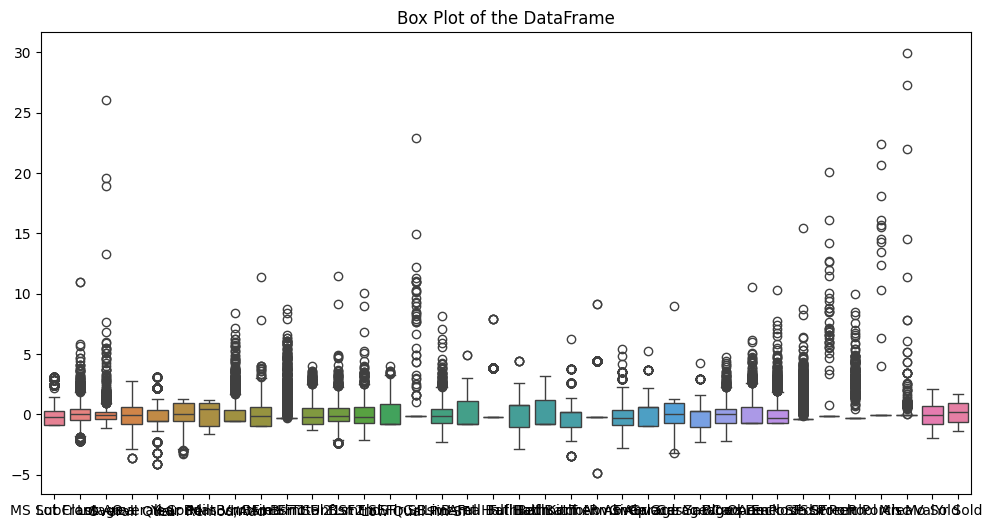

In [108]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Convert the array back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=data.columns)

display(df_scaled.head())
print()

print(df_scaled.shape)
print()

# after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title('Box Plot of the DataFrame')
plt.show()


## 4. Median and MAD Scaling

This method is similar to mean centering but uses the median and the median absolute deviation instead of the mean and standard deviation. It is more robust to outliers.



,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-1.000000,7.1,10.947794,0.0,NaN,-0.52,-2.357143,inf,0.727027,NaN,-0.087657,0.381356,2.423729,NaN,NaN,0.688103,inf,NaN,-inf,NaN,NaN,NaN,1.0,1.0,-0.857143,NaN,0.390244,inf,1.296296,NaN,NaN,NaN,NaN,NaN,-0.5,2.0
1,-1.000000,1.0,1.071324,-1.0,inf,-0.48,-2.285714,NaN,0.264865,inf,-0.699463,-0.457627,-0.796610,NaN,NaN,-1.755627,NaN,NaN,-inf,NaN,-inf,NaN,-1.0,-1.0,-0.809524,-inf,2.032520,inf,-1.000000,NaN,NaN,inf,NaN,NaN,0.0,2.0
2,-1.000000,1.1,2.367892,0.0,inf,-0.60,-2.500000,inf,1.494595,NaN,-0.212880,1.436441,1.038136,NaN,NaN,-0.363344,NaN,NaN,-inf,inf,NaN,NaN,0.0,-1.0,-0.952381,-inf,-1.365854,inf,0.333333,NaN,NaN,NaN,NaN,inf,0.0,2.0
3,-1.000000,2.3,0.844853,1.0,NaN,-0.20,-1.785714,NaN,1.878378,NaN,2.073345,4.745763,4.347458,NaN,NaN,2.147910,inf,NaN,NaN,inf,NaN,NaN,2.0,1.0,-0.476190,NaN,0.341463,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,-1.0,2.0
4,0.333333,0.4,2.153676,-1.0,NaN,0.96,0.357143,NaN,1.137838,NaN,-1.175313,-0.262712,-0.661017,inf,NaN,0.601286,NaN,NaN,NaN,inf,NaN,NaN,0.0,0.0,0.904762,NaN,0.016260,inf,0.259259,NaN,NaN,NaN,NaN,NaN,-1.5,2.0



(2930, 36)



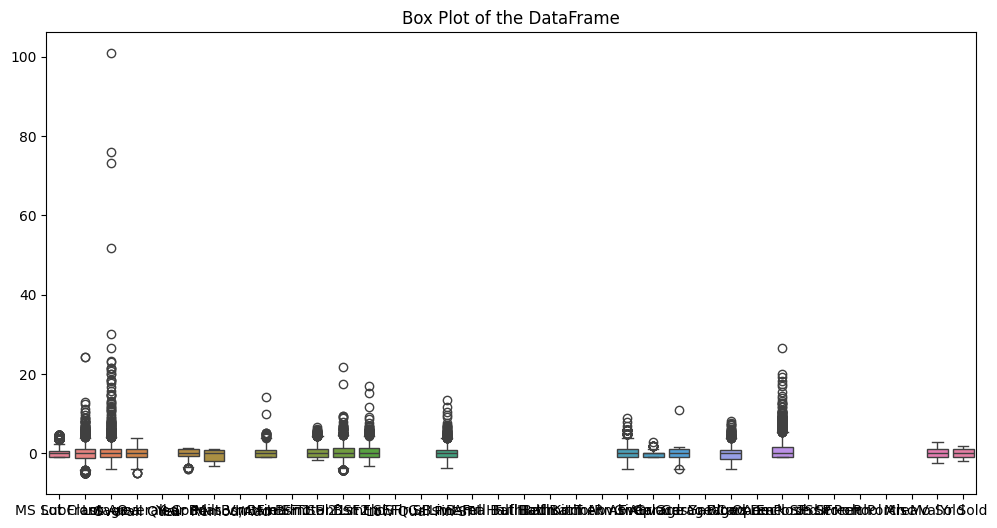

In [109]:
# Function to perform Median and MAD Scaling
def median_mad_scaling(data):
    median = np.median(data, axis=0)
    mad = np.median(np.abs(data - median), axis=0)
    return (data - median) / mad

# Applying the scaling to specific features
scaled_data_mad = median_mad_scaling(data.values)

# Convert the array back to a DataFrame
df_scaled_mad = pd.DataFrame(scaled_data_mad, columns=data.columns)

display(df_scaled_mad.head())
print()

print(df_scaled_mad.shape)
print()

# after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled_mad)
plt.title('Box Plot of the DataFrame')
plt.show()


## 5. Quantile Transformation

Quantile Transformation (or Quantile Normalization) transforms the features to follow a uniform or a normal distribution. This can be particularly useful when you want to smooth out unusual distributions and minimize the effects of outliers.

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,-5.199338,2.465488,2.293377,0.007527,-0.412900,-0.418371,-0.835558,0.496390,0.483658,-5.199338,-0.051460,0.235509,1.236652,-5.199338,-5.199338,0.465405,0.788455,-5.199338,-0.741388,-5.199338,0.168912,-0.053973,0.461215,1.727466,-0.627196,0.235509,0.353487,1.016672,0.570161,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.443149,5.199338
1,-5.199338,0.644086,0.688795,-0.715218,0.561327,-0.384375,-0.803958,-5.199338,0.163824,1.298271,-0.520661,-0.321611,-0.595437,-5.199338,-5.199338,-1.384628,-5.199338,-5.199338,-0.741388,-5.199338,-0.963423,-0.053973,-0.922330,-5.199338,-0.590949,-0.892038,1.215372,0.441766,-5.199338,-5.199338,-5.199338,1.460531,-5.199338,-5.199338,-0.042668,5.199338
2,-5.199338,0.743040,1.276491,0.007527,0.561327,-0.499230,-0.912774,0.485069,1.031509,-5.199338,-0.139710,0.720036,0.551294,-5.199338,-5.199338,-0.249131,-5.199338,-5.199338,-0.741388,0.879040,0.168912,-0.053973,-0.195700,-5.199338,-0.707140,-0.892038,-0.711981,1.882160,0.166367,-5.199338,-5.199338,-5.199338,-5.199338,3.271258,-0.042668,5.199338
3,-5.199338,1.283836,0.574549,0.615025,-0.412900,-0.160010,-0.582009,-5.199338,1.292822,-5.199338,1.071784,2.225955,2.119300,-5.199338,-5.199338,1.236652,0.788455,-5.199338,0.568686,0.879040,0.168912,-0.053973,1.025123,1.727466,-0.337506,0.235509,0.293986,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.791884,5.199338
4,0.305796,0.263985,1.194699,-0.715218,-0.412900,0.504922,0.247134,-5.199338,0.803369,-5.199338,-0.971082,-0.182928,-0.480839,0.663545,-5.199338,0.393598,-5.199338,-5.199338,0.568686,0.879040,0.168912,-0.053973,-0.195700,0.533636,0.454249,0.235509,0.047692,1.029375,0.118204,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-1.140077,5.199338



(2930, 36)



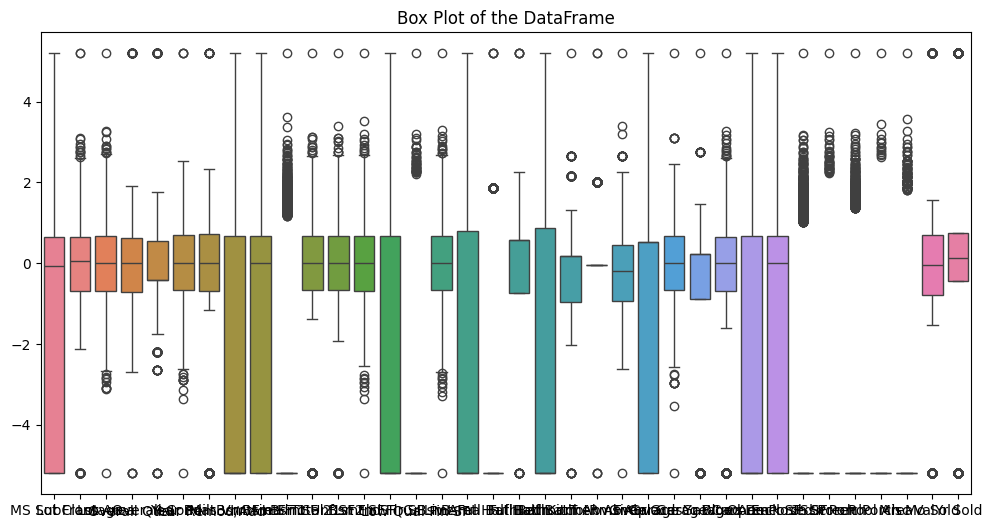

In [111]:
# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)

# Fit and transform the data
quantile_data = quantile_transformer.fit_transform(data)

# Convert the array back to a DataFrame
df_quantile = pd.DataFrame(quantile_data, columns=data.columns)

display(df_quantile.head())
print()

print(df_quantile.shape)
print()

# after standardization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_quantile)
plt.title('Box Plot of the DataFrame')
plt.show()



## Explanation and Use Cases:

- Mean Centering and Variance Scaling: Best used when data is normally distributed. Often required by algorithms that assume data is centered, like support vector machines and logistic regression.

- Median and MAD Scaling: Useful in datasets with outliers, as using the median and MAD is less sensitive to them than the mean and standard deviation. This can be beneficial for any model that might otherwise be skewed by outlier values.

- Quantile Transformation: This approach transforms the data to a specified distribution, which can be helpful when models assume uniform or normal distributions. It also handles outliers by compressing them towards the distribution's ends.